<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/OSK_MEF_motifs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing chromVAR and SeATAC on detecting differential motifs in OSK induced neruon reprogramming


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr',
  'BSgenome.Mmusculus.UCSC.mm10',
  'magick', 'patchwork',
  'chromVAR', 'motifmatchr'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10', 'magick',
  'patchwork', 'chromVAR', 'motifmatchr'

also installing the dependencies ‘rjson’, ‘formatR’, ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘lambda.r’, ‘futile.options’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘RcppEigen’, ‘BH’, ‘futile.logger’, ‘snow’, ‘Biobase’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘MatrixGeneric

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

crayon       (1.5.0 -> 1.5.1 ) [CRAN]
vctrs        (0.3.8 -> 0.4.0 ) [CRAN]
fansi        (1.0.2 -> 1.0.3 ) [CRAN]
magrittr     (2.0.2 -> 2.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
gplots       (NA    -> 3.1.1 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 18 packages: crayon, vctrs, fansi, magrittr, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpuEZDkr/remotes566d1aa443/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Install other non-CRAN packages

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

tzdb (0.2.0 -> 0.3.0) [CRAN]


Installing 1 packages: tzdb

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpuEZDkr/remotes566504407b/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
BiocManager::install('ggrepel')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'ggrepel'

Old packages: 'crayon', 'fansi', 'gert', 'knitr', 'magrittr', 'processx',
  'readxl', 'sass', 'testthat', 'tinytex', 'tzdb', 'vctrs', 'cluster', 'MASS',
  'Matrix', 'mgcv', 'nlme'



In [ ]:
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(ggplot2)
library(magick)
library(patchwork)
library(chromVAR)
library(motifmatchr)
library(chromVARmotifs)
library(ggrepel)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

In [ ]:
Sys.time() - start_time

Time difference of 27.89361 mins

## Parameters

In [ ]:
ARGS <- list(
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,
  log_ratio_cutoff = 0.2
)

## Load BAM files

In [ ]:
remote_bam_files <- c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam',
  MEF_OSK_D7 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}

In [ ]:
local_bam_files <- gsub('https://', './', remote_bam_files)
all(file.exists(local_bam_files))

[1] TRUE

## Load bed files

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## chromVAR analysis on MEF data

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [ ]:
counts <- count_reads(
  resize(gr0, width = ARGS[['block_size']], fix = 'center'),
  local_bam_files, 
  genome = BSgenome.Mmusculus.UCSC.mm10,  
  fragment_size_range = c(0, 10000)
)

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



In [ ]:
se_MEF <- SummarizedExperiment(
  assays = list(counts = counts),
  rowRanges = gr0,
  colData = data.frame(group = c('MEF', 'MEF_OSK_D7'))
)
se_MEF <- addGCBias(se_MEF, genome = BSgenome.Mmusculus.UCSC.mm10)
se_MEF <- se_MEF[rowSums(assays(se_MEF)$counts > 0) >= 2]

In [ ]:
motif_ix <- matchMotifs(homer_pwms, se_MEF, genome = 'mm10')

In [ ]:
dev_MEF <- computeDeviations(object = se_MEF, annotations = motif_ix)

In [ ]:
v_MEF <- computeVariability(dev_MEF)

## Load motif results for MEF. This results were computed by using the following scripts:

* MEF OSK: https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_OSKM_all_motifs/results.tsv

We used the results of `vae_latent=5`

In [ ]:
remote_MEF_result_file <- 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_OSKM_all_motifs/results.tsv'
local_MEF_result_file <- gsub('https://', './', remote_MEF_result_file)
system(sprintf('wget -cx %s', remote_MEF_result_file))

In [ ]:
x <- read.table(remote_MEF_result_file, header = TRUE, sep = '\t')
sprintf('wget -O %s %s', './MEF.tsv', x$remote_output_file[1]) %>% system()
res_MEF <- read.table('./MEF.tsv', header = FALSE, sep = '\t')

In [ ]:
res <- cbind(res_MEF, group = 'MEF')

In [ ]:
gr <- GRanges(
  seqnames = res[, 1],
  ranges = IRanges(res[, 2], res[, 3]),
  strand = res[, 5],
  pvalue_z = res[, 6],
  padj = res[, 7],
  nucleosome_treatment = res[, 8],
  nucleosome_control = res[, 9],
  log_ratio = res[, 10],
  motif = res[, 11],
  group = res[, 12]
)

In [ ]:
df <- data.frame(
  padj = gr$padj,
  log_ratio = gr$log_ratio,
  motif = gr$motif,
  group = gr$group
) %>%
  mutate(motif = factor(motif, names(homer_pwms))) %>%
  group_by(group, motif) %>%
  summarize(
    up = sum(padj < 0.05 & log_ratio > ARGS[['log_ratio_cutoff']]) / n() * 100,
    down = sum(padj < 0.05 & log_ratio < -ARGS[['log_ratio_cutoff']]) / n() * 100
  ) %>%
  mutate(motif_name = case_when(
    motif == 'OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer' ~ 'Oct4',
    motif == 'Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer' ~ 'Sox2',
    motif == 'Klf4(Zf)/mES-Klf4-ChIP-Seq(GSE11431)/Homer' ~ 'Klf4',
    motif == 'Tcf4(HMG)/Hct116-Tcf4-ChIP-Seq(SRA012054)/Homer' ~ 'Tcf4',
    motif == 'Cdx2(Homeobox)/mES-Cdx2-ChIP-Seq(GSE14586)/Homer' ~ 'Cdx2',
    motif == 'Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer' ~ 'Tcfcp2l1',
    motif == 'Tcf3(HMG)/mES-Tcf3-ChIP-Seq(GSE11724)/Homer' ~ 'Tcf3',
    motif == 'Sox4(HMG)/proB-Sox4-ChIP-Seq(GSE50066)/Homer' ~ 'Sox4',
    motif == 'c-Myc(bHLH)/mES-cMyc-ChIP-Seq(GSE11431)/Homer' ~ 'Myc',
    motif == 'Tgif1(Homeobox)/mES-Tgif1-ChIP-Seq(GSE55404)/Homer' ~ 'Tgif1',
    motif == 'Nr5a2(NR)/mES-Nr5a2-ChIP-Seq(GSE19019)/Homer' ~ 'Nr5a2', 
    motif == 'RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer' ~ 'Runx',
    motif == 'BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer' ~ 'Batf',
    motif == 'AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer' ~ 'AP-1',
    TRUE ~ ''
  ))  %>% 
  cbind(
    chromvar_padj = c(v_MEF$p_value_adj),
    chromvar_diff = c(assays(dev_MEF)$z[, 2] - assays(dev_MEF)$z[, 1])
  ) %>%
  mutate(
    chromvar_log10padj = -log10(chromvar_padj + 1e-100),
    seatac_diff = down - up,
    chromvar_group = case_when(
      chromvar_diff >= 0 ~ 'more_abundant',
      chromvar_diff < 0 ~ 'less_abundant'
    )
  ) %>%
  mutate(motif_group = case_when(
    grepl('mES', motif, ignore.case = TRUE) ~ 'mES'
  ))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


## Compare the changes of nucleosome and read density of mES ChIP data 

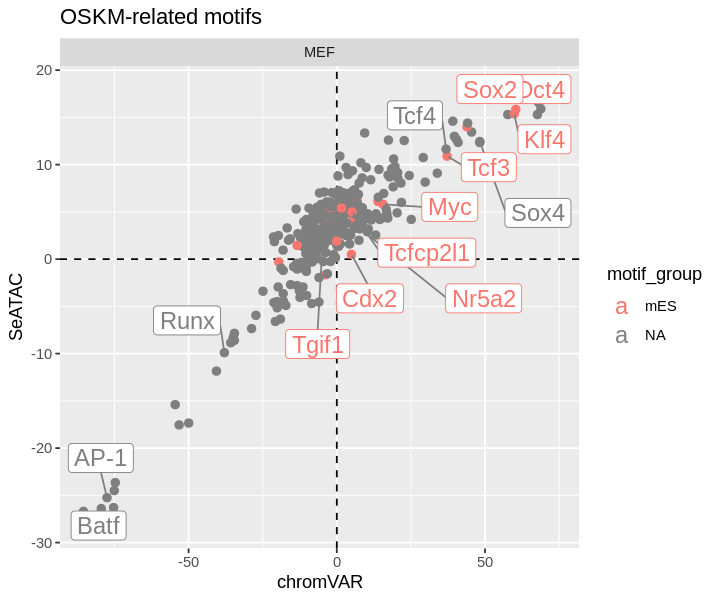

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
df %>%
  ggplot(aes(x = chromvar_diff, y = seatac_diff, color = motif_group)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    geom_vline(xintercept = 0, linetype = 'dashed') +
    geom_point(size = 2) +
    geom_label_repel(aes(label = motif_name), box.padding   = 0.35,  point.padding = 0., segment.color = 'grey50', max.overlaps = 1000, size = 5) +
    facet_grid(. ~ group) +
    xlab('chromVAR') + ylab('SeATAC') +
    ggtitle('OSKM-related motifs')

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggrepel_0.9.1                      chromVARmotifs_0.2.0              
 [3] motifmatchr_1.16.0                 chromVAR_1.16.0                   
 [5] patchwork_1.1.1                    magick_2.7.3                      
 [7] circlize_0.4.14 

In [ ]:
Sys.time() - start_time

Time difference of 3.461688 hours